## Astronomy 406 "Computational Astrophysics" (Fall 2017)

### Week 5: Statistical description of data

<b>Reading:</b> notes below, as well as $\S$[14.1](https://umich.instructure.com/files/5261902/download?download_frd=1) of [Numerical Recipes](http://numerical.recipes) and $\S$3.1-3.3 of [Machine Learning](http://www.astroml.org/).

In [2]:
%matplotlib inline
from matplotlib import rcParams
rcParams["savefig.dpi"] = 90
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Now we begin to explore statistical properties of real-life data sets.  Suppose we have an array of measurements of some real object, for example, the height of students in this class, or in the whole University of Michigan.  Assume we have $n$ measurements $x_i$ that are independent of each other.

Let's generate a sample of 100 points and plot it as a histogram.  We will be using a useful set of histogram options from the <b>astroML</b> library.  Make sure you have it installed with your Python distribution (see http://www.astroml.org/user_guide/installation.html).

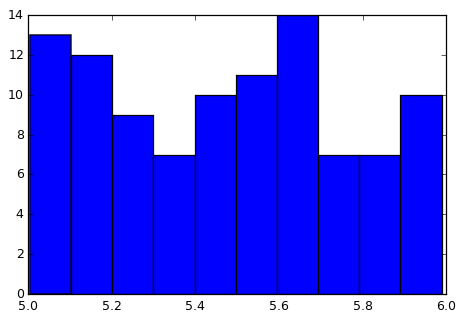

In [2]:
np.random.seed(0)
x = 5 + np.random.random(100)

plt.hist(x)
plt.show()

Now the [astroML histogram](http://www.astroml.org/book_figures/chapter5/fig_hist_binsize.html):

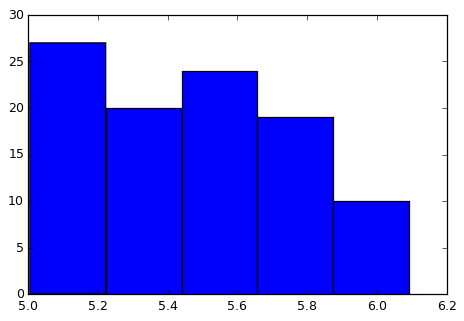

In [3]:
from astroML.plotting import hist
hist(x, bins='scotts')
plt.show()

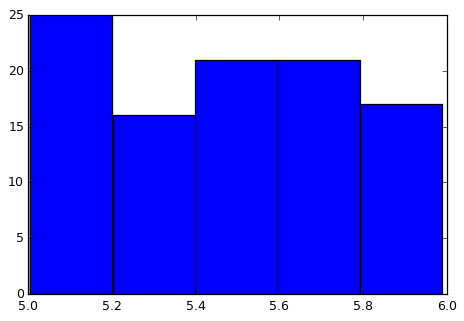

In [4]:
hist(x, bins='knuth')
plt.show()

The <i>mean</i> of the sample is defined as
$$ \bar{x} = {1\over n} \sum_{i=0}^{n-1} x_i. $$

The <i>variance</i> of the sample is defined as
$$ Var = {1\over n-1} \sum_{i=0}^{n-1} (x_i - \bar{x})^2. $$

The <i>standard deviation</i> is 
$\sigma = \sqrt{Var}$.

Higher order moments of the distribution, such as the <i>skewness</i> and <i>kurtosis</i>, are defined in $\S$14.1 of NR.

The <i>median</i> is defined as the point right in the middle of a sorted (monotonically increasing, or decreasing) sample: $x_{\rm med} = x_{(n-1)/2}$.

<b>Exercise:</b> What do you expect the mean of our sample to be?  The standard deviation?

In [5]:
print "mean =", np.mean(x)
print "st_dev =", np.std(x)
print "median =", np.median(x)

mean = 5.47279383951
st_dev = 0.288301605015
median = 5.46748098725


Now let's take a different sample.  It will be generated from a normal (also often called Gaussian) distribution, with zero mean ($\mu=0$) and standard deviation $\sigma=1$. 

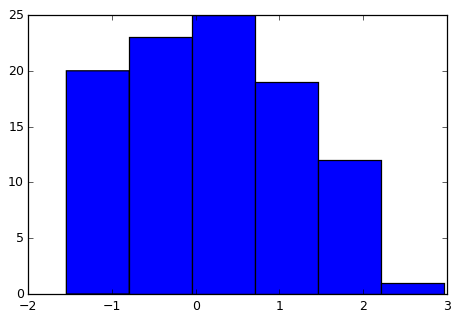

In [6]:
x2 = np.random.normal(0, 1, 100)
#plt.hist(x2)
hist(x2, bins='scotts')
plt.show()

In [7]:
print "mean =", np.mean(x2)
print "st_dev =", np.std(x2)
print "median =", np.median(x2)

mean = 0.192334344077
st_dev = 0.996378052847
median = 0.253256576141


<b>Exercise:</b> These numbers are not exactly equal to $\mu$ and $\sigma$ used to generate the sample.  Why?  Calculate and plot the error of the mean and standard deviation as a function of sample size.

In [8]:
npoints = []
emean = []
estd = []

for n in range(1,9):
    x2 = np.random.normal(0, 1, 10**n)
    print "error for n=%d: mean = %.2e  st_dev = %.2e"%\
    (n, abs(np.mean(x2)-0.), abs(np.std(x2)-1.))
    npoints.append(10**n)
    emean.append(abs(np.mean(x2)-0.))
    estd.append(abs(np.std(x2)-1.))

error for n=1: mean = 5.82e-01  st_dev = 5.32e-02
error for n=2: mean = 4.50e-02  st_dev = 3.61e-02
error for n=3: mean = 3.13e-02  st_dev = 2.24e-02
error for n=4: mean = 1.27e-02  st_dev = 9.81e-03
error for n=5: mean = 4.22e-03  st_dev = 1.49e-03
error for n=6: mean = 9.46e-04  st_dev = 1.41e-04
error for n=7: mean = 2.50e-04  st_dev = 3.20e-04
error for n=8: mean = 4.30e-05  st_dev = 1.24e-04


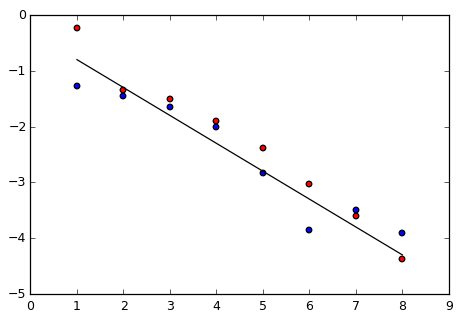

In [9]:
plt.scatter(np.log10(npoints), np.log10(emean), c='r')
plt.scatter(np.log10(npoints), np.log10(estd), c='b')
xx = np.array([ 1, 8 ])
plt.plot(xx, -0.5*xx-0.3, '-k')
plt.show()

#Demonstrates how accuracy goes like 1 - xbar / mu -> N^(-1/2) accuracy

If we need a sorted array, we can use the built-in function with the intuitive name <b>sorted</b>, or simply use an array method <b>sort</b>.  The former creates a new array, while the latter changes the values of $x$.

In [10]:
xs = sorted(x)
x.sort

<function sort>

Let's plot three Gaussian functions with same mean but different standard deviations.  This is an example from <b>astroML</b> figure 3.8.  You can see the source on their website, http://www.astroml.org/book_figures/chapter3/.

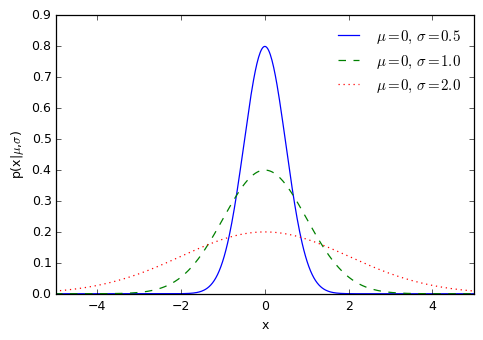

In [11]:
sigma_values = [0.5, 1.0, 2.0]
linestyles = ['-', '--', ':']
mu = 0
x = np.linspace(-10, 10, 1000)

for sig, ls in zip(sigma_values, linestyles):
    dist = stats.norm(mu, sig)   # create a normal distribution
    plt.plot(x, dist.pdf(x), ls=ls, label=r'$\mu=%i,\ \sigma=%.1f$' % (mu, sig))

plt.xlim(-5, 5)
plt.ylim(0, 0.9)
plt.xlabel('x')
plt.ylabel('p(x|$\mu$,$\sigma$)')
plt.legend(frameon=False)
plt.show()

<b>Exercise:</b> Write your own routine to evaluate the mean, median, and standard deviation of a sample.  Run it on the sample $x_i$ above and compare the answers with those given by numpy.

In [ ]:
#Run on x2, you should ge same as np (0.08, 0.94, and -0.008)

def mean(data):
    return 1./len(data) * sum(data)
    
def median(data):
    if len(data) % 2 == 1:
        return sorted(data)[len(data) / 2]
    else:
        return (sorted(data)[len(data)/2] + sorted(data)[len(data)/2 - 1]) / 2.
    
def stdev(data): 
    dev = []
    
    meanval = mean(data)
    
    for val in data:
        dev.append( (meanval - val)**2. )
    
    return 1./(len(data) - 1.) * sum(dev)
    
print mean(x2) / np.mean(x2)
print stdev(x2) / np.std(x2)
print median(x2) / np.median(x2)

#### Meaning of a distribution function

In order to understand fundamental properties of the sample, or to make predictions for a distribution of future measurements (example: election polls), we wish to find a continuous distribution function that best describes the sample.  In the statistical language it means the sample is consistent with being drawn from that distribution function, $p(x)$.

The distribution function (DF) is properly normalized as
$\int_{-\infty}^{\infty} p(x) dx = 1$.

In terms of $p(x)$, the mean is defined as
$\bar{x} = \int x P(x) dx$,
with similar expressions for the higher moments.

<b>Exercise:</b> Is this definition of the mean consistent with the discrete defition above?  How can we show it mathematically?

Converting x_mean = integral[x * P(x) dx] = sum[x_i] / N -> P(x) = 1/N * sum[delta(x - x_i)] from 0 to N

P(x) = 1/N * sum[delta(x - x_i)] -> Approx P(x) = 1/N * sum[gaussian for sigma -> 0]




The normal DF is probably the most commonly used in all of statistics.  Other useful DFs in astronomy are the Poisson distribution and Student's $t$-distribution.

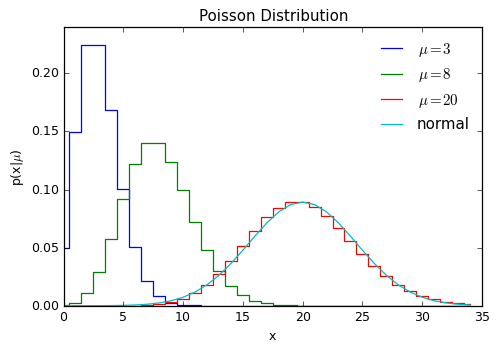

In [2]:
x = np.arange(0, 35)
    
for mu in [3, 8, 20]:
    plt.plot(x, stats.poisson.pmf(x,mu), label=r'$\mu=%i$' % mu, linestyle='steps-mid')

# plot a normal distribution for comparison
plt.plot(x, stats.norm.pdf(x, mu, np.sqrt(mu)), label='normal')
    
plt.xlim(0, 35)
plt.ylim(0, 0.24)
plt.xlabel('x')
plt.ylabel('p(x|$\mu$)')
plt.title('Poisson Distribution')
plt.legend(frameon=False)
plt.show()

For large N, Poisson's distribution approaches Gaussian with $\mu = N$, $\sigma = N^{1/2}$.
Let's now draw a set of $N$ random numbers obeying the Poisson and normal distributions.

In [3]:
#As mu increases, poisson merges into gaussian distrib
#Sigma goes like sqrt(N) and something about 1 / sqrt(N)

N = 1000

for mu in [1,10,100]:
    z1 = np.random.poisson(mu, N)
    print 'Poisson: mean = %5.3f st_dev = %5.3f' % (np.mean(z1), np.std(z1, ddof=1))
    z2 = np.random.normal(mu, np.sqrt(mu), N)
    print 'Normal:  mean = %5.3f st_dev = %5.3f ratio of means = %.3f' % (np.mean(z2), np.std(z2, ddof=1), np.mean(z2)/np.mean(z1))

Poisson: mean = 1.031 st_dev = 1.010
Normal:  mean = 1.022 st_dev = 0.984 ratio of means = 0.991
Poisson: mean = 9.973 st_dev = 3.367
Normal:  mean = 10.120 st_dev = 3.153 ratio of means = 1.015
Poisson: mean = 100.503 st_dev = 10.009
Normal:  mean = 99.862 st_dev = 9.836 ratio of means = 0.994


<b>Exercise:</b> Why is the calculated mean value for a sample, $\bar{x}$, not equal exactly the center of the distribution, $\mu$?

The error of the mean, estimated from the sample, is $\delta\bar{x} = \sqrt{Var\over N}$. 
Let's check how the error of the mean and standard deviation vary with size of sample:

C:\Users\Adam2\Anaconda\lib\site-packages\ipykernel\__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


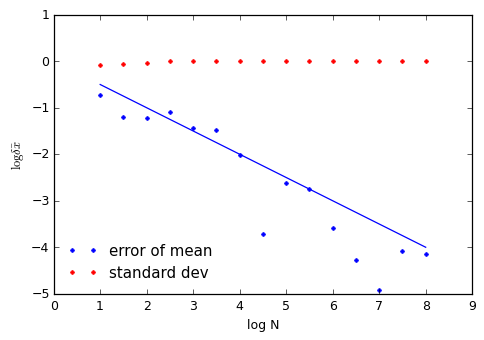

In [4]:
mu = 0.
sig = 1.
Nl = []
errl = []
stdl = []

for N in np.logspace(1,8,15):
    z = np.random.normal(mu, sig, N)
    Nl.append(N)
    errl.append(abs(np.mean(z)-mu))
    stdl.append(np.std(z, ddof=1))

x = np.array([1, 8])
plt.plot(x, -x/2., '-')

plt.xlim(0, 9)
plt.ylim(-5, 1)
plt.xlabel('log N')
plt.ylabel(r'$\log{\delta\bar{x}}$')
plt.plot(np.log10(Nl), np.log10(errl), 'b.', label='error of mean')
plt.plot(np.log10(Nl), np.log10(stdl), 'r.', label='standard dev')
plt.legend(frameon=False, loc=3)
plt.show()

We can see that the standard deviation approaches a constant ($\sigma$), while the error of the mean decreases as $\delta\bar{x} \approx \sigma/N^{1/2}$.

Given a sample of $N$ measurements $x_i$ drawn from a Gaussian distribution $N(\mu,\sigma)$, the variable $t = {\bar{x}-\mu \over \delta\bar{x}}$ follows Student's [$t$-distribution](http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.t.html):

$$
p_s(t|\nu) = {\Gamma\left({\nu+1 \over 2}\right) \over \sqrt{\pi \nu} \, \Gamma\left({\nu \over 2}\right)} \left({1 + {t^2 \over \nu}}\right)^{-(\nu+1)/2}
$$

For large $\nu$, $p_s(t|\nu)$ approaches normal $N(0,1)$ distribution.  Thus the error of the mean for a large sample is itself distributed as a Gaussian.

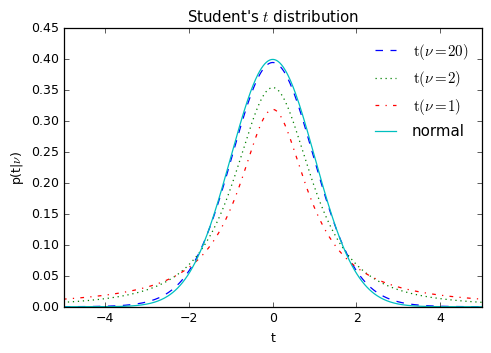

In [5]:
nu_values = [20, 2, 1]
linestyles = ['--', ':', '-.']
t = np.linspace(-10, 10, 1000)

for nu, ls in zip(nu_values, linestyles):
    if nu >= 1e10:
        label = r'$\mathrm{t}(\nu=\infty)$'
    else:
        label = r'$\mathrm{t}(\nu=%.0f)$' % nu
    plt.plot(t, stats.t.pdf(t,nu), ls=ls, label=label)

plt.plot(t, stats.norm.pdf(t,0,1), '-', label='normal')

plt.xlim(-5, 5)
plt.ylim(0.0, 0.45)

plt.xlabel('t')
plt.ylabel(r'p(t|$\nu$)')
plt.title("Student's $t$ distribution")
plt.legend(frameon=False)
plt.show()

#### Quantifying differences between samples

Not let's take some real data.  File <b>gc.dat</b> (located in Canvas/Files/Data files) contains measurements of three properties of old massive star clusters in our Galaxy: <i>metallicity</i> (which is the log10 of the ratio of iron abundance to its value in the Sun), <i>mass</i> (in units of solar mass), and <i>distance from the center of the Galaxy</i> (in kpc).  Before doing any statistical analysis, it is always a good idea to look at the data first.

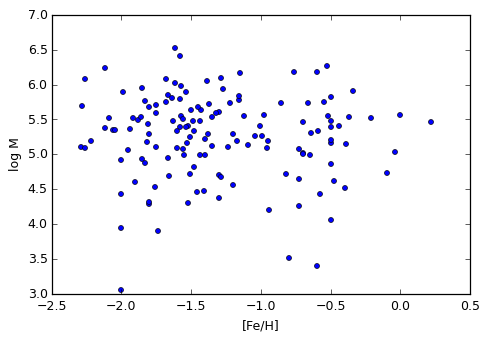

In [3]:
feh, m, d = np.loadtxt("DataFiles/gc.dat", unpack=True)

lgm = np.log10(m)
lgd = np.log10(d)

plt.plot(feh, lgm, 'bo', markersize=4)
plt.xlabel('[Fe/H]')
plt.ylabel('log M')
plt.show()

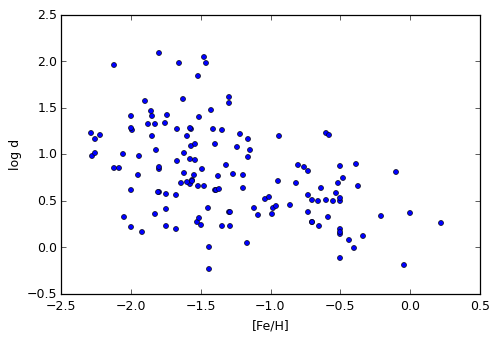

In [4]:
plt.plot(feh, lgd, 'bo', markersize=4)
plt.xlabel('[Fe/H]')
plt.ylabel('log d')
plt.show()

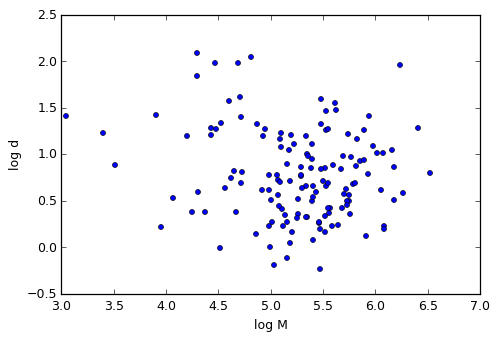

In [5]:
plt.plot(lgm, lgd, 'bo', markersize=4)
plt.xlabel('log M')
plt.ylabel('log d')
plt.show()

When we deal with astronomical or physical variables, we often use logarithms.  Note an interesting property that the mean of $\log{M}$ is not equal log of mean $M$ (but medians are the same):

In [6]:
print 'log of M_mean = %6.4f median = %6.4f' % (np.log10(np.mean(m)), np.log10(np.median(m)))
print 'logM_mean     = %6.4f median = %6.4f' % (np.mean(lgm), np.median(lgm))

log of M_mean = 5.5682 median = 5.3404
logM_mean     = 5.2539 median = 5.3404


All three variables belong to a given object.  So if we select a subset of objects, we pick all three numbers together.  Let's split the sample in two parts, based on the threshold value of metallicity of -1, and calculate basic statistics:

In [7]:
feh_th = -1.0

feh1 = feh[feh < feh_th]
lgm1 = lgm[feh < feh_th]
lgd1 = lgd[feh < feh_th]

feh2 = feh[feh >= feh_th]
lgm2 = lgm[feh >= feh_th]
lgd2 = lgd[feh >= feh_th]

print 'sample 1 [Fe/H] mean = %.3f st_dev = %.3f' % (np.mean(feh1), np.std(feh1,ddof=1))
print 'sample 2 [Fe/H] mean = %.3f st_dev = %.3f' % (np.mean(feh2), np.std(feh2,ddof=1))

print 'sample 1 lgM mean = %.3f st_dev = %.3f' % (np.mean(lgm1), np.std(lgm1,ddof=1))
print 'sample 2 lgM mean = %.3f st_dev = %.3f' % (np.mean(lgm2), np.std(lgm2,ddof=1))

print 'sample 1 lgd mean = %.3f st_dev = %.3f' % (np.mean(lgd1), np.std(lgd1,ddof=1))
print 'sample 2 lgd mean = %.3f st_dev = %.3f' % (np.mean(lgd2), np.std(lgd2,ddof=1))

sample 1 [Fe/H] mean = -1.617 st_dev = 0.307
sample 2 [Fe/H] mean = -0.566 st_dev = 0.265
sample 1 lgM mean = 5.302 st_dev = 0.579
sample 2 lgM mean = 5.145 st_dev = 0.642
sample 1 lgd mean = 0.912 st_dev = 0.493
sample 2 lgd mean = 0.503 st_dev = 0.333


The significance of a difference of means of two samples is also measured by Student’s <i>t</i> distribution, with

$$
t = {\bar{x}_A - \bar{x}_B \over (\delta\bar{x}_A^2 + \delta\bar{x}_B^2)^{1/2}},
$$

where $\delta\bar{x}_i^2 \equiv {Var_i \over N_i}$.

The <i>effective</i> number of degrees of freedom is a weighted sum of the two sample sizes:

$$
\nu = {(\delta\bar{x}_{A}^{2} + \delta\bar{x}_{B}^{2})^2 \over \delta\bar{x}_{A}^{4}/(N_A-1) + \bar{x}_{B}^{4}/(N_B-1)}.
$$

The observed difference of the means is significant when $\bar{x}_A - \bar{x}_B$ is large, but how large?  It is commonly accepted that the difference is statistically significant when

$$ P_s(>t) = 2 \int_t^\infty p_s(x) dx \lesssim 0.01. $$

Let's compare the mean masses and distances of our two samples:

In [8]:
dxA = np.std(lgm2,ddof=1)/np.sqrt(len(lgm2))
dxB = np.std(lgm1,ddof=1)/np.sqrt(len(lgm1))
t = (np.mean(lgm2)-np.mean(lgm1))/np.sqrt(dxA**2 + dxB**2)
nu = (dxA**2 + dxB**2)**2/(dxA**4/(len(lgm2)-1) + dxB**4/(len(lgm1)-1))
print "M: |t|=",abs(t)," P=",stats.t.cdf(t,nu)*2

dxA = np.std(lgd2,ddof=1)/np.sqrt(len(lgd2))
dxB = np.std(lgd1,ddof=1)/np.sqrt(len(lgd1))
t = (np.mean(lgd2)-np.mean(lgd1))/np.sqrt(dxA**2 + dxB**2)
nu = (dxA**2 + dxB**2)**2/(dxA**4/(len(lgd2)-1) + dxB**4/(len(lgd1)-1))
print "d: |t|=",abs(t)," P=",stats.t.cdf(t,nu)*2

M: |t|= 1.37805152117  P= 0.172380039369
d: |t|= 5.75727824126  P= 7.19621049375e-08


The difference of the distances is significant, but of masses is not.

### Kolmogorov-Smirnov test

<b>Reading:</b> notes below, as well as $\S$[14.3](https://umich.instructure.com/files/2677283/download?download_frd=1) of [Numerical Recipes](http://numerical.recipes).

A more general, and accurate, test of whether a given sample is consistent with being drawn from a known model distribution function (DF) is Kolmogorov-Smirnov test.  It measures the maximum difference of the cumulative DF $P(>x)$ of the sample and model over the whole range of data $x$:

$$ D = \max |S_N(x) - P(>x)|, $$

from -inf to inf. This D is essentially the difference in height between some prob distrib and some sample step function that is observed (like a histogram). This is where

$$ S_N = {1\over N} \sum_{i=0}^{N-1} h(x-x_i), $$

and $h(x)$ is the step function.

We can also test whether two samples are consistent with being drawn from the same DF by calculating

$$ D = \max |S_{N1}(x) - S_{N2}(x)|. $$

The KS statistic $D$ remains unchanged if the variable $x$ is monotonically transformed, for example, from $x$ to $\log{x}$.

The statistical significance of $D$ is measured by the probability function $P_{KS}$, which is implemented in [<b>stats.ks_2samp</b>](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ks_2samp.html).

In [9]:
D, p = stats.ks_2samp(lgm1, lgm2)
print "M: D_KS= ", D, " P_KS= ", p
D, p = stats.ks_2samp(lgd1, lgd2)
print "d: D_KS= ", D, " P_KS= ", p

#NOTE: D is Meaningless without knowing probability. Depends on number of points. We actually care more about P...

M: D_KS=  0.143094447081  P_KS=  0.540360300793
d: D_KS=  0.420028476507  P_KS=  3.04399270315e-05


This significance depends sensitively on the number of points in the samples.  For example, doubling the samples by repeating the same numbers changes $P_{KS}$.

In [10]:
x1 = np.array([lgm1, lgm1]).flatten()
x2 = np.array([lgm2, lgm2]).flatten()
D, p = stats.ks_2samp(x1, x2)
print "doubling the sample of M"
print "M: D_KS= ", D, " P_KS= ", p

#If prob is low -> KS test shows something is inconsistent
#If prob is not low -> KS test shows something is NOT inconsistent. This does NOT imply consistent

doubling the sample of M
M: D_KS=  0.143094447081  P_KS=  0.15867204969


If $N_1 + N_2$ is large, $P_{KS}$ will often be very small.  However it does not indicate as high a significance of the difference.  On the other hand, if $P_{KS}$ is high, we <i>cannot</i> say that the two distributions are consistent.  All we can say is that they are <i>not inconsistent</i> with each other.

As a rule of thumb of the practitioners, $P_{KS} < 0.01$ indicates the two samples are inconsistent with being drawn from the same DF.  If $P_{KS} > 0.01$, they are not inconsistent.

### Correlation coefficients

<b>Reading:</b> notes below, as well as $\S$[14.5-6](https://umich.instructure.com/files/2677286/download?download_frd=1) of [Numerical Recipes](http://numerical.recipes) and $\S$3.6 of [Machine Learning](http://www.astroml.org/).

Often we are interested whether two properties of objects in our sample are correlated, that it, vary dependent on each other.  The two commonly used correlation coefficients measure the degree of correlation.

Pearson's linear correlation coefficient is implemented in [<b>stats.pearsonr</b>](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html). 

$$
   r = {\sum_i (x_i - \bar{x}) (y_i - \bar{y}) \over \sqrt{\sum_i (x_i - \bar{x})^2} \sqrt{\sum_i (y_i - \bar{y})^2}}
$$

It varies between $-1 \le r \le 1$.  For uncorrelated variables, $r=0$.

In [13]:
r, p = stats.pearsonr(m, feh)
print 'Pearson r, p:', r

Pearson r, p: -0.0628142430524


If the pairs $(x_i, y_i)$ are drawn from two uncorrelated Gaussian distributions, then the distribution of $r$ follows Student's $t$ distribution with $\nu = N-2$ degrees of freedom and 
$$
    t = r \sqrt{N-2 \over 1-r^2}.
$$
Thus, a measured value of $r$ can be used to assign the significance of the statement that $\{x_i\}$ and $\{y_i\}$ are correlated.

One-sided $t$ CDF gives the probability that a value of $r$ as large as observed would arise y chance.  Note, that Scipy's routine gives the double-sided probability (effectively, for absolute value $|r|$). 

In [14]:
N = len(m)
t = r*np.sqrt((N-2)/(1.-r**2))
nu = N-2
print 'Significance of r=',r,' is ',stats.t.cdf(t,nu)," Scipy's value is",p

Significance of r= -0.0628142430524  is  0.229659266984  Scipy's value is 0.459318533967


Spearman's rank correlation coefficient uses only the ranks of data points, not their actual values.  Its inference is more robust than Pearson's coefficient. It is implemented in [<b>stats.spearmanr</b>](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html).

In [15]:
rs, p = stats.spearmanr(m, feh)
print 'Spearman r, p:', rs, p

Spearman r, p: -0.0465705009013 0.583438431423
